# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
from dotenv import load_dotenv
load_dotenv()
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/samkohnle/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
Python-dotenv could not parse statement starting at line 4
Python-dotenv could not parse statement starting at line 5
Python-dotenv could not parse statement starting at line 12


In [2]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API")
print(api_key)

109dc51e81a245a38c5d85cfb2daf0bd


In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the BitcoiAND Bitcoin", language="en", page_size=50, sort_by="relevancy")n news articles
btc_articles = newsapi.get_everything(q="bitcoin", language="en", sort_by="relevancy")

In [5]:
# Fetch the Ethereum news articles
eth_articles = newsapi.get_everything(q='ethereum', language='en', sort_by='relevancy')


In [6]:
def get_sentiment_score(article, based_on):
    sentiments = []

    for article in article["articles"]:
        try:
            text = article[based_on]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]
            sentiments.append({
                "Compound": compound,
                "Negative": neg,
                "Neutral": neu,
                "Positive": pos,
                based_on : text
            })

        except AttributeError:
            pass

    # Create DataFrame
    df = pd.DataFrame(sentiments)
    return df

In [7]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiment_df = get_sentiment_score(btc_articles, 'content')
btc_sentiment_df

Compound  Negative  Neutral  Positive  \
0     0.0000     0.000    1.000     0.000   
1     0.5106     0.000    0.901     0.099   
2     0.0000     0.000    1.000     0.000   
3     0.5719     0.000    0.847     0.153   
4     0.4767     0.000    0.864     0.136   
5     0.1280     0.000    0.957     0.043   
6     0.0000     0.000    1.000     0.000   
7     0.0000     0.000    1.000     0.000   
8     0.0000     0.000    1.000     0.000   
9    -0.1027     0.043    0.957     0.000   
10   -0.3818     0.080    0.920     0.000   
11    0.5106     0.000    0.842     0.158   
12    0.5106     0.000    0.858     0.142   
13   -0.3818     0.077    0.923     0.000   
14    0.0000     0.000    1.000     0.000   
15    0.0000     0.000    1.000     0.000   
16   -0.3182     0.062    0.938     0.000   
17    0.0000     0.000    1.000     0.000   
18    0.0000     0.000    1.000     0.000   
19   -0.0258     0.055    0.892     0.052   

                                              content  
0   The plant opening northeast of Niagara Falls t...  
1   Earlier this year, Nothing released a pair of ...  
2   MIZATA, El Salvador/LONDON, Nov 22 (Reuters) -...  
3   In keeping with a previous announcement, AMC t...  
4   Posted \r\nAfter becoming the first country to...  
5   Available for the same price, $99, on December...  
6   (Reuters) - A computer scientist who has claim...  
7   Spotify has removed the shuffle button from al...  
8   Bitcoin was trading over 7% higher on Monday m...  
9   Australian Baseball League club Perth Heat wil...  
10  Dec 4 (Reuters) - Bitcoin dropped 8.4% to $49,...  
11  Posted \r\nBitcoin shed a fifth of its value o...  
12  Posted \r\nBitcoin shed a fifth of its value o...  
13  Dec 3 (Reuters) - Bitcoin plunged 5.5% to $53,...  
14  * Bitcoin breaks past $68,000; Ether nears $5k...  
15  A representation of the virtual cryptocurrency...  
16  Bitcoin tumbled almost 5% on Monday as the sta...  
17  Posted \r\nEl Salvador plans to build the worl...  
18  Representations of the virtual currency Bitcoi...  
19  Bitcoin and other cryptocurrencies have reboun...

In [8]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiment_df = get_sentiment_score(eth_articles, 'content')
eth_sentiment_df

Compound  Negative  Neutral  Positive  \
0     0.7783     0.000    0.784     0.216   
1     0.0000     0.000    1.000     0.000   
2     0.5719     0.000    0.847     0.153   
3     0.6542     0.000    0.822     0.178   
4    -0.0516     0.079    0.847     0.074   
5    -0.1531     0.045    0.955     0.000   
6     0.5106     0.000    0.901     0.099   
7     0.4019     0.000    0.924     0.076   
8     0.3818     0.000    0.920     0.080   
9     0.4019     0.115    0.729     0.155   
10    0.2732     0.075    0.814     0.111   
11   -0.0418     0.086    0.835     0.079   
12    0.1280     0.000    0.957     0.043   
13    0.8176     0.000    0.779     0.221   
14   -0.3182     0.062    0.938     0.000   
15    0.0000     0.000    1.000     0.000   
16    0.2247     0.000    0.942     0.058   
17    0.0772     0.062    0.867     0.070   
18    0.0000     0.000    1.000     0.000   
19    0.0000     0.000    1.000     0.000   

                                              content  
0   If you claim ownership, someone will probably ...  
1   More than $1.2 million has already been spent ...  
2   In keeping with a previous announcement, AMC t...  
3   Ethereum has been on a tear this year. Its out...  
4   Blockchain startup MonoX Finance said on Wedne...  
5   On Monday, Budweiser joined the non-fungible t...  
6   Earlier this year, Nothing released a pair of ...  
7   Apple CEO Tim Cook said he owns cryptocurrency...  
8   Regal movie theater.Shutterstock\r\nMovie-thea...  
9   The wait is finally over. After a year-long de...  
10  MicroStrategy CEO Michael SaylorJoe Raedle/Get...  
11  The Fine Print: The following comments are own...  
12  Available for the same price, $99, on December...  
13  With crypto rewards cards, a small percentage ...  
14  Bitcoin has lost almost 20 per cent in less th...  
15  Decentralized finance or DeFi is a global fina...  
16  The U.S. Captioning Company and the British In...  
17  Image source, Getty Images\r\nImage caption, T...  
18  Rahul Rai, co-head of Market Neutral at BlockT...  
19  Hours ago, a website appeared online with the ...

In [9]:
# Describe the Bitcoin Sentiment
btc_sentiment_df.describe()

Compound   Negative    Neutral   Positive
count  20.000000  20.000000  20.000000  20.000000
mean    0.074905   0.015850   0.944950   0.039150
std     0.294209   0.029039   0.059718   0.061014
min    -0.381800   0.000000   0.842000   0.000000
25%    -0.006450   0.000000   0.898750   0.000000
50%     0.000000   0.000000   0.957000   0.000000
75%     0.215175   0.010750   1.000000   0.063750
max     0.571900   0.080000   1.000000   0.158000

In [10]:
# Describe the Ethereum Sentiment
eth_sentiment_df.describe()

Compound  Negative    Neutral   Positive
count  20.000000  20.00000  20.000000  20.000000
mean    0.232830   0.02620   0.893050   0.080650
std     0.320458   0.03871   0.083112   0.072785
min    -0.318200   0.00000   0.729000   0.000000
25%     0.000000   0.00000   0.831750   0.000000
50%     0.176350   0.00000   0.910500   0.075000
75%     0.429075   0.06200   0.955500   0.121500
max     0.817600   0.11500   1.000000   0.221000

### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum - .08065

Q: Which coin had the highest compound score?

A: Ethereum - .8176

Q. Which coin had the highest positive score?

A: Ethereum - .221

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
lemmatizer = WordNetLemmatizer()

stop_words = set(stopwords.words('english'))

In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z0-9 ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean.lower())
    
    # Lemmatize words into root words
    root_words = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    words = [word for word in words if word not in stop_words]   
     
    return root_words

In [14]:
# Create a new tokens column for Bitcoin
btc_sentiment_df['tokens'] = btc_sentiment_df['content'].apply(tokenizer)
btc_sentiment_df.head()

Compound  Negative  Neutral  Positive  \
0    0.0000       0.0    1.000     0.000   
1    0.5106       0.0    0.901     0.099   
2    0.0000       0.0    1.000     0.000   
3    0.5719       0.0    0.847     0.153   
4    0.4767       0.0    0.864     0.136   

                                             content  \
0  The plant opening northeast of Niagara Falls t...   
1  Earlier this year, Nothing released a pair of ...   
2  MIZATA, El Salvador/LONDON, Nov 22 (Reuters) -...   
3  In keeping with a previous announcement, AMC t...   
4  Posted \r\nAfter becoming the first country to...   

                                              tokens  
0  [the, plant, opening, northeast, of, niagara, ...  
1  [earlier, this, year, nothing, released, a, pa...  
2  [mizata, el, salvadorlondon, nov, 22, reuters,...  
3  [in, keeping, with, a, previous, announcement,...  
4  [posted, after, becoming, the, first, country,...

In [ ]:
# Create a new tokens column for Ethereum
eth_sentiment_df['tokens'] = eth_sentiment_df['content'].apply(tokenizer)
eth_sentiment_df.head()

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [ ]:
def get_tokens(df):
    tokens = []
    for token in df['tokens']:
        tokens.extend(token)
    return tokens


btc_tokens = get_tokens(btc_sentiment_df)
eth_tokens = get_tokens(eth_sentiment_df)

In [ ]:
def bigram_counter(tokens, N=2): 
    words_count = dict(Counter(ngrams(tokens, n=N)))
    return words_count

In [ ]:
from collections import Counter
from nltk import ngrams

In [ ]:
# Generate the Bitcoin N-grams where N=2
bigram_btc = bigram_counter(btc_tokens, 2)

In [ ]:
# Generate the Ethereum N-grams where N=2
bigram_eth = bigram_counter(eth_tokens, 2)

In [ ]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [22]:
# Use token_count to get the top 10 words for Bitcoin
top_10_token_btc = token_count(btc_tokens)
top_10_token_btc

[('a', 33),
 ('the', 26),
 ('bitcoin', 19),
 ('char', 18),
 ('of', 16),
 ('to', 13),
 ('in', 10),
 ('on', 10),
 ('and', 9),
 ('world', 8)]

In [23]:
# Use token_count to get the top 10 words for Ethereum
top_10_token_eth = token_count(eth_tokens)
top_10_token_eth

[('of', 27),
 ('the', 27),
 ('a', 21),
 ('char', 19),
 ('in', 12),
 ('to', 9),
 ('for', 9),
 ('ha', 8),
 ('on', 8),
 ('with', 7)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

Text(0.5, 1.0, 'Bitcoin Word Cloud')

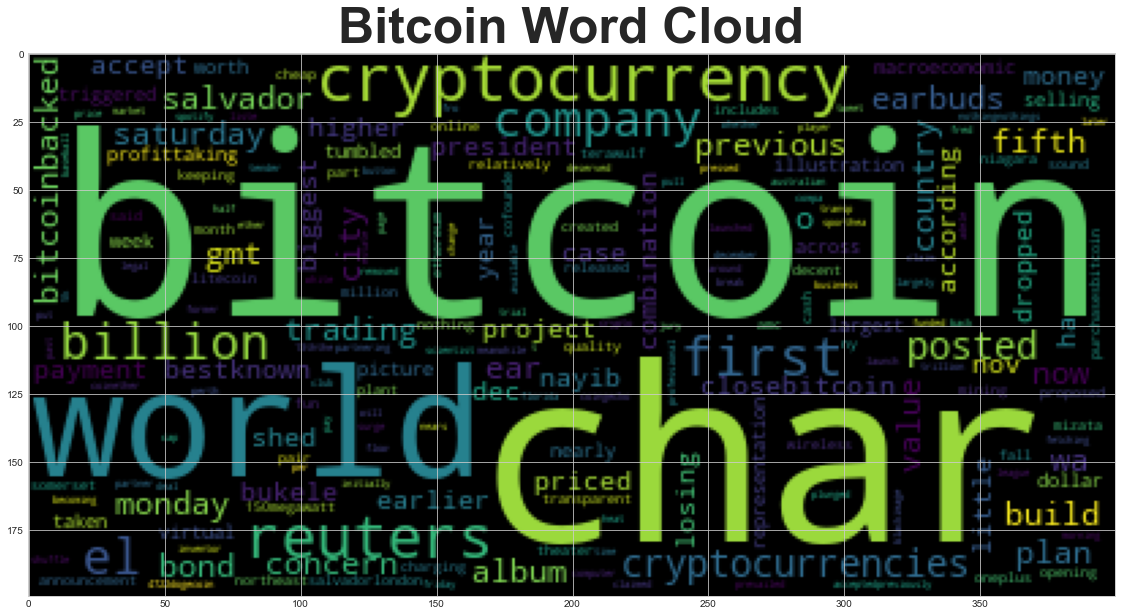

In [25]:
# Generate the Bitcoin word cloud
wc = WordCloud(collocations=False).generate(' '.join(btc_tokens))
plt.imshow(wc)
plt.title(label='Bitcoin Word Cloud', fontdict={'fontsize': 50, 'fontweight':'bold'})

Text(0.5, 1.0, 'Ethereum Word Cloud')

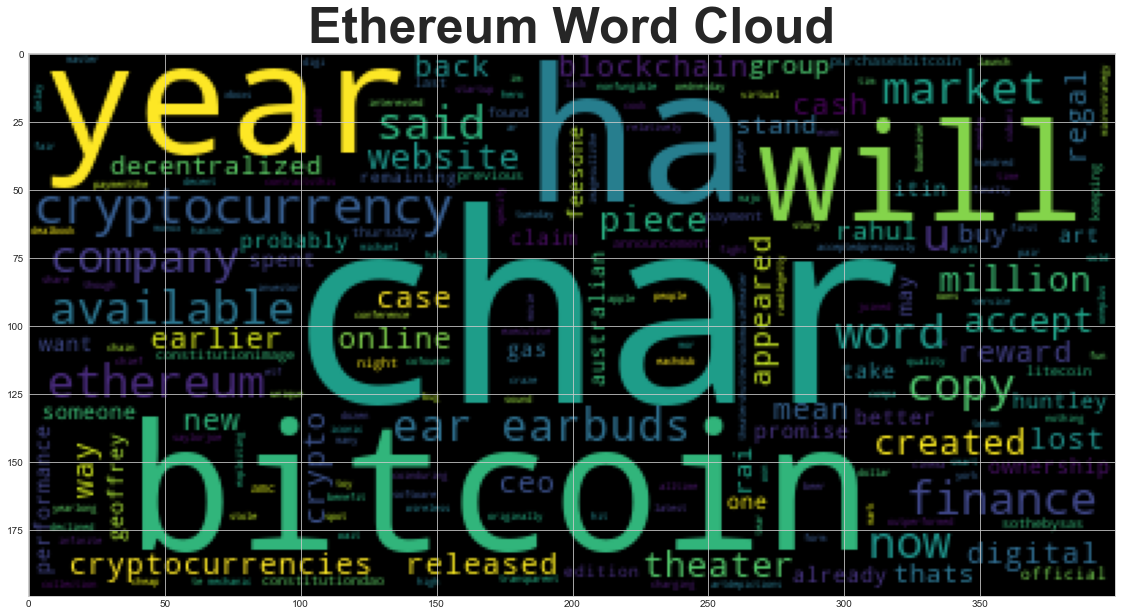

In [26]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(' '.join(eth_tokens))
plt.imshow(wc)
plt.title(label='Ethereum Word Cloud', fontdict={'fontsize': 50, 'fontweight':'bold'})

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [27]:
import spacy
from spacy import displacy

In [29]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [30]:
# Concatenate all of the Bitcoin text together
btc_content = ' '.join(btc_sentiment_df['content'])

In [31]:
# Run the NER processor on all of the text
doc= nlp(btc_content)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [32]:
# Render the visualization
displacy.render(doc, style='ent')

In [33]:
# List all Entities
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

Niagara Falls PERSON
this month DATE
Somerset GPE
N.Y. GPE
$550 million MONEY
Terawulf DATE
150-megawatt QUANTITY
Earlier this year DATE
99 MONEY
OnePlus ORG
El Salvador/ GPE
Reuters ORG
El Salvador GPE
first ORDINAL
Bitcoin City GPE
$1 billion MONEY
Nayib Bukele PERSON
AMC ORG
first ORDINAL
El Salvador GPE
Bitcoin City GPE
99 MONEY
December 13th DATE
The Ear 1 WORK_OF_ART
Nothings Ear 1 PERSON
earlier this year DATE
Reuters ORG
Monday DATE
Florida GPE
half CARDINAL
Spotify ORG
Adele PERSON
30 CARDINAL
+3186 ORG
7% PERCENT
Monday DATE
morning TIME
around $66,105 MONEY
3% PERCENT
4,722 MONEY
over 9% PERCENT
Australian Baseball League ORG
Perth Heat PERSON
first ORDINAL
Hea PERSON
Dec 4 DATE
Reuters ORG
8.4% PERCENT
49,228.82 MONEY
20:01 CARDINAL
Saturday DATE
4,514.87 MONEY
Bitcoin PERSON
28.7% PERCENT
fifth ORDINAL
Saturday DATE
nearly a billion dollars MONEY
fifth ORDINAL
Saturday DATE
nearly a billion dollars MONEY
Reuters ORG
5.5% PERCENT
53,435.9 MONEY
22:04 CARDINAL
Friday DATE
3,

---

### Ethereum NER

In [34]:
# Concatenate all of the Ethereum text together
eth_content = ' '.join(eth_sentiment_df['content'])

In [35]:
# Run the NER processor on all of the text
doc= nlp(eth_content)

# Add a title to the document
doc.user_data["title"] = "Ethereum NER"

In [36]:
# Render the visualization
displacy.render(doc, style='ent')

In [37]:
# List all Entities
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

this year DATE
Australian Geoffrey Huntley PERSON
More than $1.2 million MONEY
One CARDINAL
13 CARDINAL
the Official Edition of the WORK_OF_ART
Constitution LAW
Sothebys GPE
last Thursday TIME
night TIME
ConstitutionDAO PERSON
AMC ORG
this year DATE
this year DATE
Mark Cuban PERSON
Wednesday DATE
$31 million MONEY
Ars Te ORG
Monday DATE
Budweiser ORG
first ORDINAL
hundreds of dollars MONEY
Earlier this year DATE
99 MONEY
OnePlus ORG
Apple ORG
Tim Cook PERSON
The New York Times' ORG
Tuesday DATE
Shutterstock ORG
Regal Cinemas PERSON
more than 500 CARDINAL
dozens CARDINAL
year-long DATE
Xboxs ORG
Halo Infinite ORG
MicroStrategy ORG
Michael SaylorJoe Raedle/Getty Images PERSON
ETF ORG
99 MONEY
December 13th DATE
The Ear 1 WORK_OF_ART
Nothings Ear 1 PERSON
earlier this year DATE
1-2% PERCENT
less than two weeks DATE
DeFi GPE
Ethereum ORG
DeFi GPE
The U.S. Captioning Company ORG
the British Institute of Verbatim Reporters ORG
Getty Images ORG
Ethereum ORG
US GPE
Rahul Rai PERSON
Market Neut

---